# Recall Enforcement Analysis

In [1]:
import requests

In [2]:
url = "https://2eraiuh.dlai.link/api/facilities"

params = {
    
}

response = requests.get(url, params=params)
data = response.json()
data

{'error': 'Unauthorized - Invalid or missing API key'}

In [3]:
# Loads API key & saves it into variable API key
import os
from dotenv import load_dotenv

load_dotenv()
api_key = os.getenv("FOOD_SAFETY_API_KEY")

In [4]:
api_key

'sk_test_7AH92K4jd8E5F1vPzQrX3sT9Ln6m2Di_bJe8W3vYp0N4zU6xR7w'

In [5]:
url = "https://2eraiuh.dlai.link/api/facilities"

params = {
    "api_key": api_key
}

response = requests.get(url, params=params)
data = response.json()
data

{'data': [{'critical_violations': 0,
   'days_since_last_inspection': 267,
   'employee_count': 182,
   'facility_id': 'FAC001',
   'facility_name': 'Tropical Harvest Oasis Operations',
   'inspection_date': '2024-05-16',
   'non_critical_violations': 2,
   'previous_score': 75,
   'production_volume': 11383,
   'risk_category': 'Medium',
   'shifts_per_day': 2,
   'square_footage': 182969,
   'state': 'AZ',
   'total_score': 76,
   'training_hours_monthly': 482},
  {'critical_violations': 1,
   'days_since_last_inspection': 191,
   'employee_count': 121,
   'facility_id': 'FAC002',
   'facility_name': 'Blue Ridge Harvest House',
   'inspection_date': '2024-07-31',
   'non_critical_violations': 2,
   'previous_score': 66,
   'production_volume': 6091,
   'risk_category': 'Medium',
   'shifts_per_day': 1,
   'square_footage': 121579,
   'state': 'KS',
   'total_score': 77,
   'training_hours_monthly': 322},
  {'critical_violations': 1,
   'days_since_last_inspection': 187,
   'employee_

In [6]:
data.keys()

dict_keys(['data', 'metadata', 'success'])

In [7]:
len(data["data"])

10

In [8]:
data["data"][0]

{'critical_violations': 0,
 'days_since_last_inspection': 267,
 'employee_count': 182,
 'facility_id': 'FAC001',
 'facility_name': 'Tropical Harvest Oasis Operations',
 'inspection_date': '2024-05-16',
 'non_critical_violations': 2,
 'previous_score': 75,
 'production_volume': 11383,
 'risk_category': 'Medium',
 'shifts_per_day': 2,
 'square_footage': 182969,
 'state': 'AZ',
 'total_score': 76,
 'training_hours_monthly': 482}

In [9]:
url = "https://2eraiuh.dlai.link/api/facilities"

params = {
    "api_key": api_key,
    "limit": 1000
}

response = requests.get(url, params=params)
data = response.json()

In [10]:
import pandas as pd

In [11]:
df = pd.DataFrame(data["data"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   critical_violations         1000 non-null   int64 
 1   days_since_last_inspection  1000 non-null   int64 
 2   employee_count              1000 non-null   int64 
 3   facility_id                 1000 non-null   object
 4   facility_name               1000 non-null   object
 5   inspection_date             1000 non-null   object
 6   non_critical_violations     1000 non-null   int64 
 7   previous_score              1000 non-null   int64 
 8   production_volume           1000 non-null   int64 
 9   risk_category               1000 non-null   object
 10  shifts_per_day              1000 non-null   int64 
 11  square_footage              1000 non-null   int64 
 12  state                       1000 non-null   object
 13  total_score                 1000 non-null   int64

In [13]:
df.describe()

,critical_violations,days_since_last_inspection,employee_count,non_critical_violations,previous_score,production_volume,shifts_per_day,square_footage,total_score,training_hours_monthly
count,1000.000000,1000.000000,1000.00000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.444000,182.355000,161.45600,3.0100,81.844000,11113.257000,1.514000,161917.345000,84.566000,568.057000
std,1.169715,106.669205,60.01433,1.6795,9.066635,5402.197003,0.500054,59973.911378,7.856804,575.876038
min,0.000000,0.000000,50.00000,0.0000,60.000000,2000.000000,1.000000,50000.000000,60.000000,134.000000
25%,1.000000,85.000000,116.00000,2.0000,76.000000,6476.500000,1.000000,116923.500000,79.000000,331.000000
50%,1.000000,184.000000,151.00000,3.0000,82.000000,10258.500000,2.000000,151300.500000,85.000000,466.000000
75%,2.000000,277.250000,199.25000,4.0000,88.000000,15534.000000,2.000000,199969.000000,90.000000,647.250000
max,6.000000,364.000000,300.00000,9.0000,100.000000,20000.000000,2.000000,300000.000000,100.000000,10520.000000


In [14]:
df["total_violations"] = df["critical_violations"] + df["non_critical_violations"]

In [15]:
df.head()

,critical_violations,days_since_last_inspection,employee_count,facility_id,facility_name,inspection_date,non_critical_violations,previous_score,production_volume,risk_category,shifts_per_day,square_footage,state,total_score,training_hours_monthly,total_violations
0,0,267,182,FAC001,Tropical Harvest Oasis Operations,2024-05-16,2,75,11383,Medium,2,182969,AZ,76,482,2
1,1,191,121,FAC002,Blue Ridge Harvest House,2024-07-31,2,66,6091,Medium,1,121579,KS,77,322,3
2,1,187,116,FAC003,Ocean Harvest Alchemy Works,2024-08-04,3,78,10481,Medium,2,116611,SD,80,306,4
3,2,44,133,FAC004,Epicurean Summit Enterprises,2024-12-25,3,94,6586,Low,1,133480,RI,99,398,5
4,2,32,201,FAC005,Harbor Harvest Pantry House,2025-01-06,2,66,14638,Medium,2,201546,HI,76,673,4


In [16]:
df["scaled_violations"] = df["total_violations"] / df["square_footage"]

In [17]:
df.head()

,critical_violations,days_since_last_inspection,employee_count,facility_id,facility_name,inspection_date,non_critical_violations,previous_score,production_volume,risk_category,shifts_per_day,square_footage,state,total_score,training_hours_monthly,total_violations,scaled_violations
0,0,267,182,FAC001,Tropical Harvest Oasis Operations,2024-05-16,2,75,11383,Medium,2,182969,AZ,76,482,2,0.000011
1,1,191,121,FAC002,Blue Ridge Harvest House,2024-07-31,2,66,6091,Medium,1,121579,KS,77,322,3,0.000025
2,1,187,116,FAC003,Ocean Harvest Alchemy Works,2024-08-04,3,78,10481,Medium,2,116611,SD,80,306,4,0.000034
3,2,44,133,FAC004,Epicurean Summit Enterprises,2024-12-25,3,94,6586,Low,1,133480,RI,99,398,5,0.000037
4,2,32,201,FAC005,Harbor Harvest Pantry House,2025-01-06,2,66,14638,Medium,2,201546,HI,76,673,4,0.000020


In [18]:
df["scaled_violations"] = df["scaled_violations"] * 100000 # convert to violations per 100,000 sqft

In [19]:
df["scaled_violations"].describe()

count    1000.000000
mean        3.195747
std         2.018113
min         0.000000
25%         1.734258
50%         2.753808
75%         4.175452
max        14.174344
Name: scaled_violations, dtype: float64

In [20]:
df.head()

,critical_violations,days_since_last_inspection,employee_count,facility_id,facility_name,inspection_date,non_critical_violations,previous_score,production_volume,risk_category,shifts_per_day,square_footage,state,total_score,training_hours_monthly,total_violations,scaled_violations
0,0,267,182,FAC001,Tropical Harvest Oasis Operations,2024-05-16,2,75,11383,Medium,2,182969,AZ,76,482,2,1.093081
1,1,191,121,FAC002,Blue Ridge Harvest House,2024-07-31,2,66,6091,Medium,1,121579,KS,77,322,3,2.467531
2,1,187,116,FAC003,Ocean Harvest Alchemy Works,2024-08-04,3,78,10481,Medium,2,116611,SD,80,306,4,3.430208
3,2,44,133,FAC004,Epicurean Summit Enterprises,2024-12-25,3,94,6586,Low,1,133480,RI,99,398,5,3.745880
4,2,32,201,FAC005,Harbor Harvest Pantry House,2025-01-06,2,66,14638,Medium,2,201546,HI,76,673,4,1.984659


In [21]:
df["scaled_violations"] = df["scaled_violations"].round(2)

In [22]:
df.head()

,critical_violations,days_since_last_inspection,employee_count,facility_id,facility_name,inspection_date,non_critical_violations,previous_score,production_volume,risk_category,shifts_per_day,square_footage,state,total_score,training_hours_monthly,total_violations,scaled_violations
0,0,267,182,FAC001,Tropical Harvest Oasis Operations,2024-05-16,2,75,11383,Medium,2,182969,AZ,76,482,2,1.09
1,1,191,121,FAC002,Blue Ridge Harvest House,2024-07-31,2,66,6091,Medium,1,121579,KS,77,322,3,2.47
2,1,187,116,FAC003,Ocean Harvest Alchemy Works,2024-08-04,3,78,10481,Medium,2,116611,SD,80,306,4,3.43
3,2,44,133,FAC004,Epicurean Summit Enterprises,2024-12-25,3,94,6586,Low,1,133480,RI,99,398,5,3.75
4,2,32,201,FAC005,Harbor Harvest Pantry House,2025-01-06,2,66,14638,Medium,2,201546,HI,76,673,4,1.98


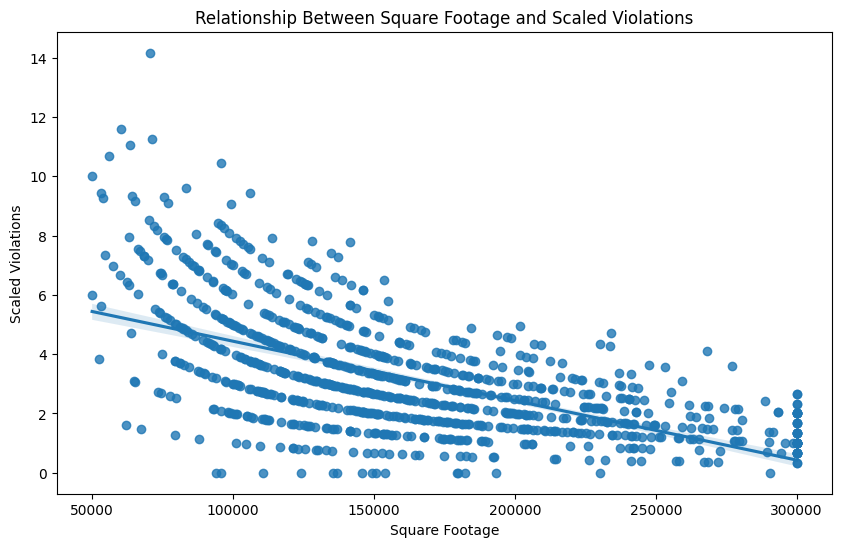

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(
    x="square_footage", 
    y="scaled_violations", 
    data=df
)

plt.xlabel("Square Footage")
plt.ylabel("Scaled Violations")
plt.title("Relationship Between Square Footage and Scaled Violations")

plt.show()

In [24]:
df.head()

,critical_violations,days_since_last_inspection,employee_count,facility_id,facility_name,inspection_date,non_critical_violations,previous_score,production_volume,risk_category,shifts_per_day,square_footage,state,total_score,training_hours_monthly,total_violations,scaled_violations
0,0,267,182,FAC001,Tropical Harvest Oasis Operations,2024-05-16,2,75,11383,Medium,2,182969,AZ,76,482,2,1.09
1,1,191,121,FAC002,Blue Ridge Harvest House,2024-07-31,2,66,6091,Medium,1,121579,KS,77,322,3,2.47
2,1,187,116,FAC003,Ocean Harvest Alchemy Works,2024-08-04,3,78,10481,Medium,2,116611,SD,80,306,4,3.43
3,2,44,133,FAC004,Epicurean Summit Enterprises,2024-12-25,3,94,6586,Low,1,133480,RI,99,398,5,3.75
4,2,32,201,FAC005,Harbor Harvest Pantry House,2025-01-06,2,66,14638,Medium,2,201546,HI,76,673,4,1.98


In [25]:
# categorize production volume into low, moderate, and high bins
df["volume_category"] = pd.qcut(df["production_volume"], q=3)

In [26]:
pd.unique(df["volume_category"])

[(7748.0, 13561.0], (1999.999, 7748.0], (13561.0, 20000.0]]
Categories (3, interval[float64, right]): [(1999.999, 7748.0] < (7748.0, 13561.0] < (13561.0, 20000.0]]

In [27]:
df["volume_category"] = pd.qcut(df["production_volume"], 
                                q=3,
                                labels=["low", "moderate", "high"])

In [28]:
df["volume_category"].value_counts()

volume_category
high        334
low         333
moderate    333
Name: count, dtype: int64

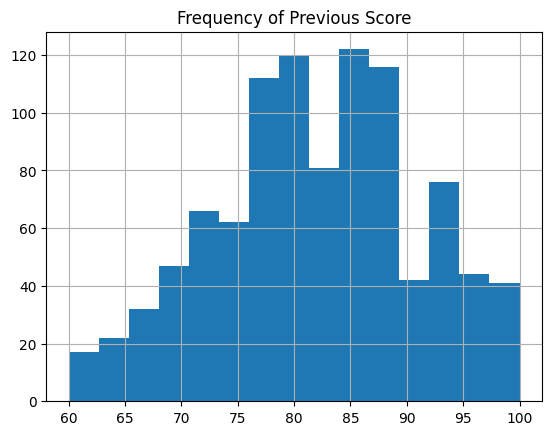

In [29]:
df["previous_score"].hist(bins=15)
plt.title("Frequency of Previous Score")
plt.show()

In [30]:
# create custom bins for previous score
boundaries = [
    df["previous_score"].min(),
    75,
    90,
    df["previous_score"].max()
]

In [31]:
boundaries

[np.int64(60), 75, 90, np.int64(100)]

In [32]:
df["score_category"] = pd.cut(df["previous_score"], 
                              bins=boundaries, 
                              labels=["at risk", "average","excellent"])

In [35]:
df["score_category"].value_counts()

score_category
average      573
at risk      235
excellent    181
Name: count, dtype: int64

In [36]:
df["score_category"].value_counts(normalize=True)

score_category
average      0.579373
at risk      0.237614
excellent    0.183013
Name: proportion, dtype: float64

In [37]:
df.head()

,critical_violations,days_since_last_inspection,employee_count,facility_id,facility_name,inspection_date,non_critical_violations,previous_score,production_volume,risk_category,shifts_per_day,square_footage,state,total_score,training_hours_monthly,total_violations,scaled_violations,volume_category,score_category
0,0,267,182,FAC001,Tropical Harvest Oasis Operations,2024-05-16,2,75,11383,Medium,2,182969,AZ,76,482,2,1.09,moderate,at risk
1,1,191,121,FAC002,Blue Ridge Harvest House,2024-07-31,2,66,6091,Medium,1,121579,KS,77,322,3,2.47,low,at risk
2,1,187,116,FAC003,Ocean Harvest Alchemy Works,2024-08-04,3,78,10481,Medium,2,116611,SD,80,306,4,3.43,moderate,average
3,2,44,133,FAC004,Epicurean Summit Enterprises,2024-12-25,3,94,6586,Low,1,133480,RI,99,398,5,3.75,low,excellent
4,2,32,201,FAC005,Harbor Harvest Pantry House,2025-01-06,2,66,14638,Medium,2,201546,HI,76,673,4,1.98,high,at risk


In [38]:
# calculates each value minus min / range
from helper_functions import normalize

In [39]:
normalize(df["days_since_last_inspection"])

0      0.733516
1      0.524725
2      0.513736
3      0.120879
4      0.087912
         ...   
995    0.708791
996    0.126374
997    0.258242
998    0.598901
999    0.994505
Name: days_since_last_inspection, Length: 1000, dtype: float64

In [40]:
# lower values are better
1 - normalize(df["days_since_last_inspection"])

0      0.266484
1      0.475275
2      0.486264
3      0.879121
4      0.912088
         ...   
995    0.291209
996    0.873626
997    0.741758
998    0.401099
999    0.005495
Name: days_since_last_inspection, Length: 1000, dtype: float64

In [41]:
df["days_normalized"] = 1 - normalize(df["days_since_last_inspection"])

In [42]:
df["violations_normalized"] = 1 - normalize(df["scaled_violations"])

<Axes: >

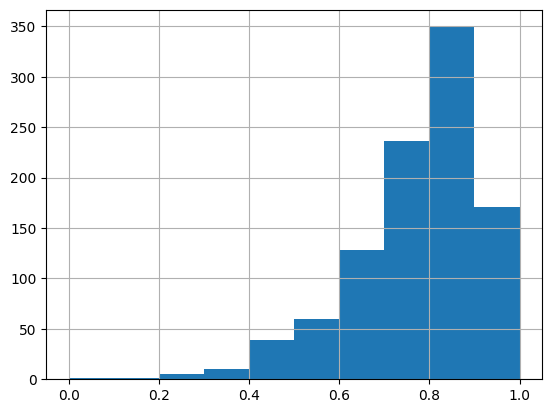

In [43]:
df["violations_normalized"].hist()

<Axes: >

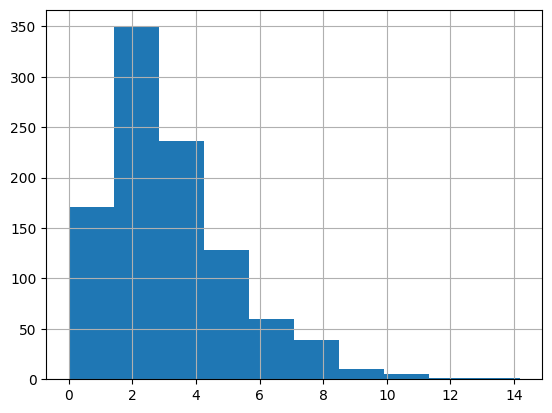

In [44]:
df["scaled_violations"].hist()

In [45]:
df["composite_score"] = (0.3*df["days_normalized"]
                        + 0.7*df["violations_normalized"]) * 100

In [46]:
df["composite_score"] = df["composite_score"].round(2)

In [47]:
df.head()

,critical_violations,days_since_last_inspection,employee_count,facility_id,facility_name,inspection_date,non_critical_violations,previous_score,production_volume,risk_category,...,state,total_score,training_hours_monthly,total_violations,scaled_violations,volume_category,score_category,days_normalized,violations_normalized,composite_score
0,0,267,182,FAC001,Tropical Harvest Oasis Operations,2024-05-16,2,75,11383,Medium,...,AZ,76,482,2,1.09,moderate,at risk,0.266484,0.923077,72.61
1,1,191,121,FAC002,Blue Ridge Harvest House,2024-07-31,2,66,6091,Medium,...,KS,77,322,3,2.47,low,at risk,0.475275,0.825688,72.06
2,1,187,116,FAC003,Ocean Harvest Alchemy Works,2024-08-04,3,78,10481,Medium,...,SD,80,306,4,3.43,moderate,average,0.486264,0.757939,67.64
3,2,44,133,FAC004,Epicurean Summit Enterprises,2024-12-25,3,94,6586,Low,...,RI,99,398,5,3.75,low,excellent,0.879121,0.735356,77.85
4,2,32,201,FAC005,Harbor Harvest Pantry House,2025-01-06,2,66,14638,Medium,...,HI,76,673,4,1.98,high,at risk,0.912088,0.860268,87.58


In [48]:
df["training_hours_per_employee"] = df["training_hours_monthly"] / df["employee_count"]

In [49]:
df.head()

,critical_violations,days_since_last_inspection,employee_count,facility_id,facility_name,inspection_date,non_critical_violations,previous_score,production_volume,risk_category,...,total_score,training_hours_monthly,total_violations,scaled_violations,volume_category,score_category,days_normalized,violations_normalized,composite_score,training_hours_per_employee
0,0,267,182,FAC001,Tropical Harvest Oasis Operations,2024-05-16,2,75,11383,Medium,...,76,482,2,1.09,moderate,at risk,0.266484,0.923077,72.61,2.648352
1,1,191,121,FAC002,Blue Ridge Harvest House,2024-07-31,2,66,6091,Medium,...,77,322,3,2.47,low,at risk,0.475275,0.825688,72.06,2.661157
2,1,187,116,FAC003,Ocean Harvest Alchemy Works,2024-08-04,3,78,10481,Medium,...,80,306,4,3.43,moderate,average,0.486264,0.757939,67.64,2.637931
3,2,44,133,FAC004,Epicurean Summit Enterprises,2024-12-25,3,94,6586,Low,...,99,398,5,3.75,low,excellent,0.879121,0.735356,77.85,2.992481
4,2,32,201,FAC005,Harbor Harvest Pantry House,2025-01-06,2,66,14638,Medium,...,76,673,4,1.98,high,at risk,0.912088,0.860268,87.58,3.348259


<Axes: xlabel='training_hours_per_employee'>

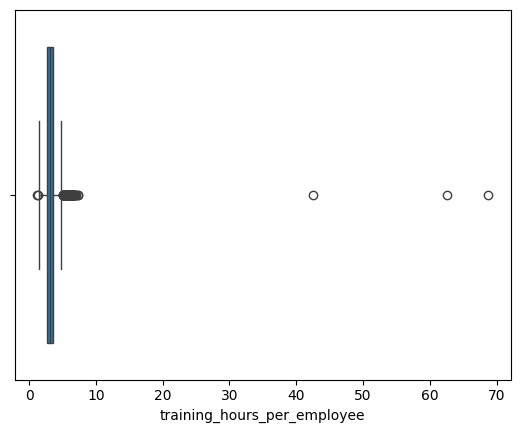

In [61]:
sns.boxplot(x=df["training_hours_per_employee"])

In [63]:
df = df[df["training_hours_per_employee"] < 20]

<Axes: >

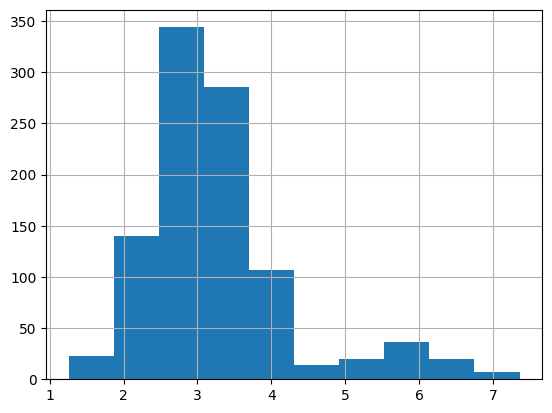

In [64]:
df["training_hours_per_employee"].hist()

In [65]:
df["training_z_score"] = (df["training_hours_per_employee"] 
                          - df["training_hours_per_employee"].mean()) / df["training_hours_per_employee"].std()

In [66]:
nonoutlier_df = df[df["training_z_score"] <= 3]

In [67]:
outlier_df = df[df["training_z_score"] > 3]

In [68]:
nonoutlier_df["production_volume"].mean()

np.float64(10904.022564102565)

In [69]:
outlier_df["production_volume"].mean()

np.float64(20000.0)